# Execute the code below

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)
df_weather = df_weather.iloc[:,[0,1,2, -4]]
df_weather

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,SUNHOUR
0,2019-01-01,9,4,5.1
1,2019-01-02,8,5,8.7
2,2019-01-03,6,0,8.7
3,2019-01-04,5,-1,5.1
4,2019-01-05,6,-1,8.7
...,...,...,...,...
360,2019-12-27,13,10,8.7
361,2019-12-28,11,5,6.9
362,2019-12-29,9,2,8.7
363,2019-12-30,12,4,8.7


# Univariate linear regression with Scikit-Learn

Scikit-Learn is the greatest Machine Learning library for Python. Do you remember that you can do Linear regression with NumPy ? You can do the same with Scikit-Learn. And many other things!
Let's start with univariate Linear regression, to learn the syntax.

## Print a regplot with seaborn to show a linear regression between Sunhours (on the X-axis) and MAX temperature (on the Y-axis).

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


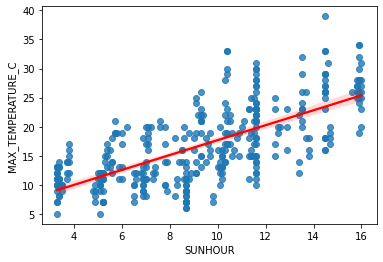

In [ ]:
# Your code here :

sns.regplot('SUNHOUR', 'MAX_TEMPERATURE_C', data = df_weather, line_kws={'color':'red'})
plt.show()

## Train the model
You just have to read and execute the code below

In [ ]:
# Scikit-Learn can find the coefficients of the linear regression
from sklearn.linear_model import LinearRegression

# First of all, you have to define 2 series :
# X-axis : the correlated column, here it is Sunhours
X = df_weather[['SUNHOUR']] 

# Y-axis : the column to predict, so MAX Temperature here
y = df_weather['MAX_TEMPERATURE_C'] 

# Hey, why is "X" in uppercase and "y" in lowercase ? That's a good point, we'll see that in the next quest. Now, you just have to use this.

# To train a machine learning model (here, it will find the equation of the linear regression), you just have launch the ".fit" method.
modelLR = LinearRegression().fit(X, y)

## Explore the model

In [ ]:
# Your model is trained, it has now some attributes.
# Coefficient, it's the "a" in your equation "aX + b"
print("coefficient :",modelLR.coef_)

# Interception, it's the "b" in your equation "aX + b"
print("intercept :", modelLR.intercept_)


coefficient : [1.28422116]
intercept : 4.8472953557195435


## Prediction for 1 value

In [ ]:
# You can "predict" the Max Temperature from the Sunhours
# For example, let's try if Sunhours is 10 :

# Hand calculation :
print("By hand :", modelLR.coef_ * 10 + modelLR.intercept_ )

# With a Scikit-Learn function :
print("Scikit-Learn :  ", modelLR.predict([[10]])  )

By hand : [17.68950691]
Scikit-Learn :   [17.68950691]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Predictions for multiple values (a Serie)
Let's predict MAX temperature for the Sunhour column of your DataFrame.

Note : You'll have to precise your column with double "[", like that  : df[['your_column]] 

*Why ? We'll see that in the next quest.*

In [ ]:
# Find a way to store the result of the prediction in a new column 'predict" of the dataframe
df_weather['predict'] = modelLR.predict(df_weather[['SUNHOUR']])
df_weather

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,SUNHOUR,predict
0,2019-01-01,9,4,5.1,11.396823
1,2019-01-02,8,5,8.7,16.020019
2,2019-01-03,6,0,8.7,16.020019
3,2019-01-04,5,-1,5.1,11.396823
4,2019-01-05,6,-1,8.7,16.020019
...,...,...,...,...,...
360,2019-12-27,13,10,8.7,16.020019
361,2019-12-28,11,5,6.9,13.708421
362,2019-12-29,9,2,8.7,16.020019
363,2019-12-30,12,4,8.7,16.020019


## Visualisations
You can predict the Max temperature from any value of Sunhour. Your prediction is now stored in a column, you can now visualize it. 

It's to you now :
Create on the same scatterplot chart :
- X-axis : Sunhours
- Y-axis : MAX temperatures in blue dots and 'predict' in red dots.

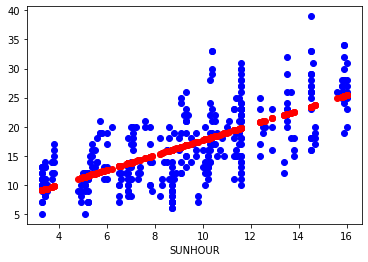

In [ ]:
# Your code here :

plt.scatter(df_weather['SUNHOUR'], df_weather['MAX_TEMPERATURE_C'], color='blue')
plt.scatter(df_weather['SUNHOUR'], df_weather['predict'], color='red')
plt.xlabel("SUNHOUR")
plt.show()

Your prediction is stored in a DataFrame. **So, you can visualize your prediction without the "source" column.** Let's try it.
Create on the same scatterplot chart :
- X-axis : DATE
- Y-axis : MAX temperatures in blue dots and 'predict' in red dots.

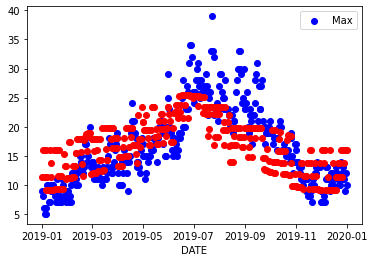

In [ ]:
# Your code here :

import matplotlib.dates as mdates

df_weather['DATE'] = pd.to_datetime(df_weather['DATE'])

plt.scatter(df_weather['DATE'], df_weather['MAX_TEMPERATURE_C'], color='blue')
plt.scatter(df_weather['DATE'], df_weather['predict'], color='red')
plt.xlabel("DATE")

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))

lgd = plt.legend;
lgd({'Max'})
plt.show()

Hey, but it doesn't seem linear ! And yet it is...

# Predictions on a more correlated column
Do the same steps to obtain a new colum "predict2". Your goal is to predict "MAX temperature" from the "MIN temperature" column.

In [ ]:
# Your code here :

# First of all, you have to define 2 series :
# X-axis : the correlated column, here it is Sunhours
X = df_weather[['MIN_TEMPERATURE_C']] 

# Y-axis : the column to predict, so MAX Temperature here
y = df_weather['MAX_TEMPERATURE_C'] 

# Hey, why is "X" in uppercase and "y" in lowercase ? That's a good point, we'll see that in the next quest. Now, you just have to use this.

# To train a machine learning model (here, it will find the equation of the linear regression), you just have launch the ".fit" method.
modelLR2 = LinearRegression().fit(X, y)

In [ ]:
df_weather['predict2'] = modelLR.predict(df_weather[['MIN_TEMPERATURE_C']])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- MIN_TEMPERATURE_C
Feature names seen at fit time, yet now missing:
- SUNHOUR

  warnings.warn(message, FutureWarning)


In [ ]:
df_weather

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,SUNHOUR,predict,predict2
0,2019-01-01,9,4,5.1,11.396823,9.984180
1,2019-01-02,8,5,8.7,16.020019,11.268401
2,2019-01-03,6,0,8.7,16.020019,4.847295
3,2019-01-04,5,-1,5.1,11.396823,3.563074
4,2019-01-05,6,-1,8.7,16.020019,3.563074
...,...,...,...,...,...,...
360,2019-12-27,13,10,8.7,16.020019,17.689507
361,2019-12-28,11,5,6.9,13.708421,11.268401
362,2019-12-29,9,2,8.7,16.020019,7.415738
363,2019-12-30,12,4,8.7,16.020019,9.984180


## Scatterplot 1
- X-axis : MIN temperature
- Y-axis : MAX temperatures in blue dots and 'predict2' in red dots.

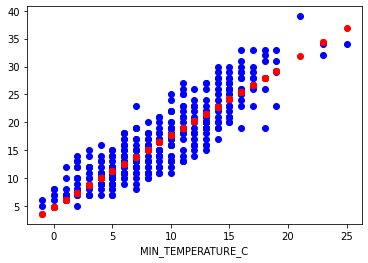

In [ ]:
#Your code here :

plt.scatter(df_weather['MIN_TEMPERATURE_C'], df_weather['MAX_TEMPERATURE_C'], color='blue')
plt.scatter(df_weather['MIN_TEMPERATURE_C'], df_weather['predict2'], color='red')
plt.xlabel("MIN_TEMPERATURE_C")
plt.show()

## Scatterplot 2
- X-axis : DATE
- Y-axis : MAX temperatures in blue dots and 'predict2' in red dots.

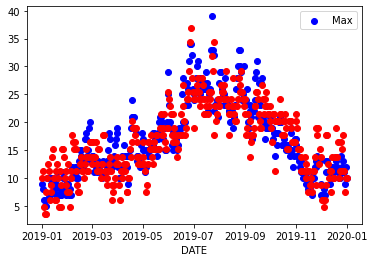

In [ ]:
# Your code here :

plt.scatter(df_weather['DATE'], df_weather['MAX_TEMPERATURE_C'], color='blue')
plt.scatter(df_weather['DATE'], df_weather['predict2'], color='red')
plt.xlabel("DATE")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
lgd = plt.legend;
lgd({'Max'})
plt.show()